# ボックスミュラー法
ボックスミュラー法とは，標準一様分布に従う乱数を用いて，標準正規分布に従う乱数を生成する方法である．
以下の事実を用いる．(照明は省略)

独立な一様分布に従う乱数$u_1, u_2$を用いて，以下のように標準正規分布に従う乱数$x_1, x_2$を生成する．
$$x_1 = -\sqrt{-2\log(u_1)} \cos (2\pi u_2)$$
$$x_2 = -\sqrt{-2\log(u_1)} \sin (2\pi u_2)$$

すると，$x_1, x_2$は標準正規分布に従う．

より一般に$N(\mu,\sigma^2)$に従う乱数を生成するには，以下のようにする．

$$x_1 = -\sigma\sqrt{-2\log(u_1)} \cos (2\pi u_2)+\mu$$
$$x_2 = -\sigma\sqrt{-2\log(u_1)} \sin (2\pi u_2)+\mu$$

なお，正規分布に従う乱数を生成するには，$x_1, x_2$のうち一方を用いればよい．

以下は，ボックスミュラー法を用いて，正規分布に従う乱数を生成するプログラム．なお，分散$\sigma^2$と平均$\mu$は，それぞれ指定できる．

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# σとμを設定
sigma = 1
mu = 0

u1 = random.uniform(0,1)
u2 = random.uniform(0,1)
x1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
#x2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)

実際に生成した乱数が，正規分布に従うことを確認しよう．

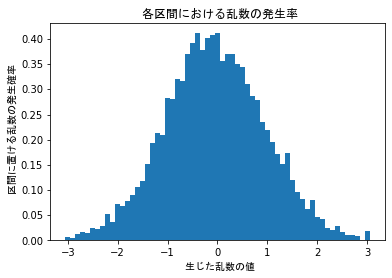

In [12]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def normal(mu,sigma):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    x1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    x2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return sigma*x1+mu

random_numbers = np.array([])#乱数を格納する配列
y_label = np.array([]) # 横軸のラベル
density=np.array([])   # 確率密度を格納する配列


N = 10000 # サンプル数

for i in range(N):
    normal_random = normal(0,1)
    random_numbers = np.append(random_numbers, [normal_random])

DIF = 0.1
k = -3
while(k<=3-DIF):
    y_label = np.append(y_label,[k])
    density = np.append(density,[(np.count_nonzero((k<=random_numbers)&(random_numbers<k+DIF)))/(N*DIF)])# ある範囲の標本値の個数の個数の数え上げ
    k += DIF
    
y_label = np.append(y_label,[3])
density=np.append(density,[np.count_nonzero((3<=random_numbers))/(N*DIF)])# 10 以上の値の個数を算出する

plt.bar(y_label,density,width=DIF)
plt.title(" 各区間における乱数の発生率",fontname="MS Gothic")
plt.xlabel(" 生じた乱数の値",fontname="MS Gothic")
plt.ylabel(" 区間に置ける乱数の発生確率",fontname="MS Gothic")
#plt.savefig("test2.png",format="png",dpi=300)

plt.show()

平均値と分散についても確認してみよう．

In [14]:
print(f"N={N}の時の標本平均と標本分散は\n{random_numbers.mean()},{random_numbers.var()}")

print(f"理論値は\n{mu},{sigma**2}")

N=10000の時の標本平均と標本分散は
0.01667464752544293,1.0064984583527312
理論値は
0,1


## 理論値との比較
参考に理論値の確率密度のグラフを作成し，生成した乱数の分布と比較してみよう．

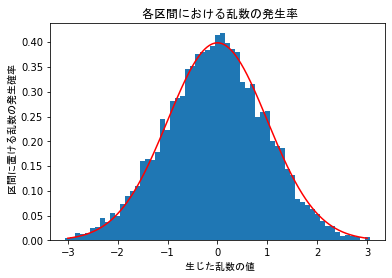

In [14]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def normal(mu,sigma):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    x1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    x2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return sigma*x1+mu

random_numbers = np.array([])#乱数を格納する配列
y_label = np.array([]) # 横軸のラベル
density=np.array([])   # 確率密度を格納する配列


N = 10000 # サンプル数

for i in range(N):
    normal_random = normal(0,1)
    random_numbers = np.append(random_numbers, [normal_random])

DIF = 0.1
k = -3
while(k<=3-DIF):
    y_label = np.append(y_label,[k])
    density = np.append(density,[(np.count_nonzero((k<=random_numbers)&(random_numbers<k+DIF)))/(N*DIF)])# ある範囲の標本値の個数の個数の数え上げ
    k += DIF
    
y_label = np.append(y_label,[3])
density=np.append(density,[np.count_nonzero((3<=random_numbers))/(N*DIF)])# 10 以上の値の個数を算出する

plt.bar(y_label,density,width=DIF)
plt.title(" 各区間における乱数の発生率",fontname="MS Gothic")
plt.xlabel(" 生じた乱数の値",fontname="MS Gothic")
plt.ylabel(" 区間に置ける乱数の発生確率",fontname="MS Gothic")



y_4=np.array([])
z=np.linspace(-3,3,1000)
y_3=np.exp(-np.power((z-mu),2)/(2*np.power(sigma,2)))/np.sqrt(2*np.pi*np.power(sigma,2))
plt.plot(z,y_3,color = "red")#理論曲線
plt.show()

## 大数の法則の確認

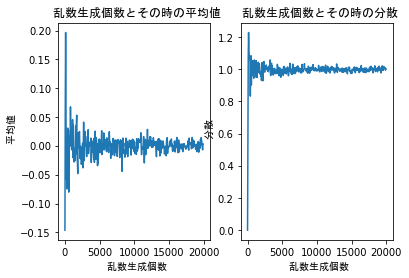

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def normal(mu,sigma):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    x1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    x2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return sigma*x1+mu

averages = np.array([])
variances = np.array([])
numbers = np.array([])
MAX = 20000
mu,sigma = 0,1

for i in range(1,MAX+1,50):
    x = np.array([])
    numbers = np.append(numbers,[i])
    for j in range(i):
        pareto_random = normal(mu,sigma)
        x = np.append(x, [pareto_random])
    averages = np.append(averages,[x.mean()])
    variances = np.append(variances,[x.var()])
   
plt.subplot(1,2,1)
plt.title(" 乱数生成個数とその時の平均値",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 平均値",fontname="MS Gothic")
plt.plot(numbers,averages)

plt.subplot(1,2,2)
plt.title(" 乱数生成個数とその時の分散",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 分散",fontname="MS Gothic")
plt.plot(numbers,variances)
#plt.savefig("test4.png",format="png",dpi=300)
plt.show()